Graph loaded with 4039 nodes and 88234 edges.
Degree Centrality: Calculated for all nodes.
Betweenness Centrality: Calculated for all nodes.
Closeness Centrality: Calculated for all nodes.
Eigenvector Centrality: Calculated for all nodes.


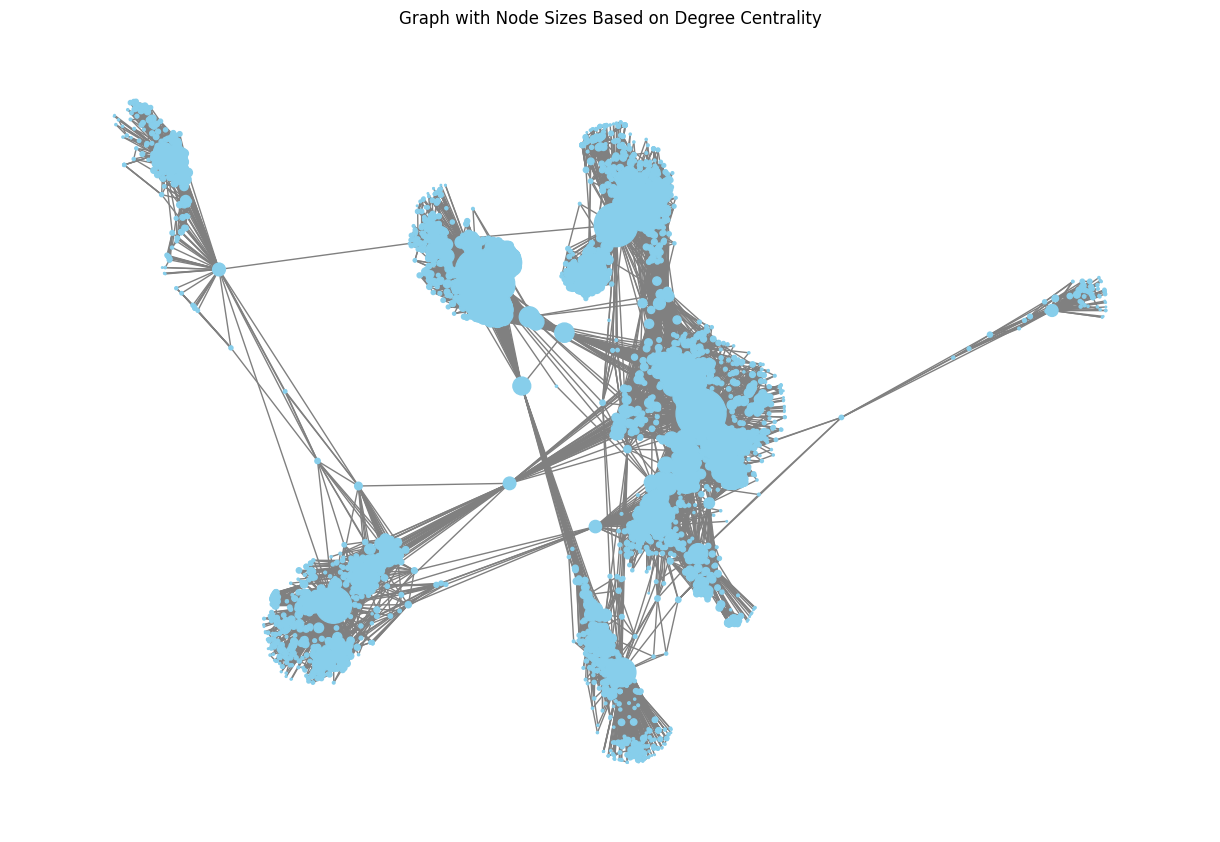

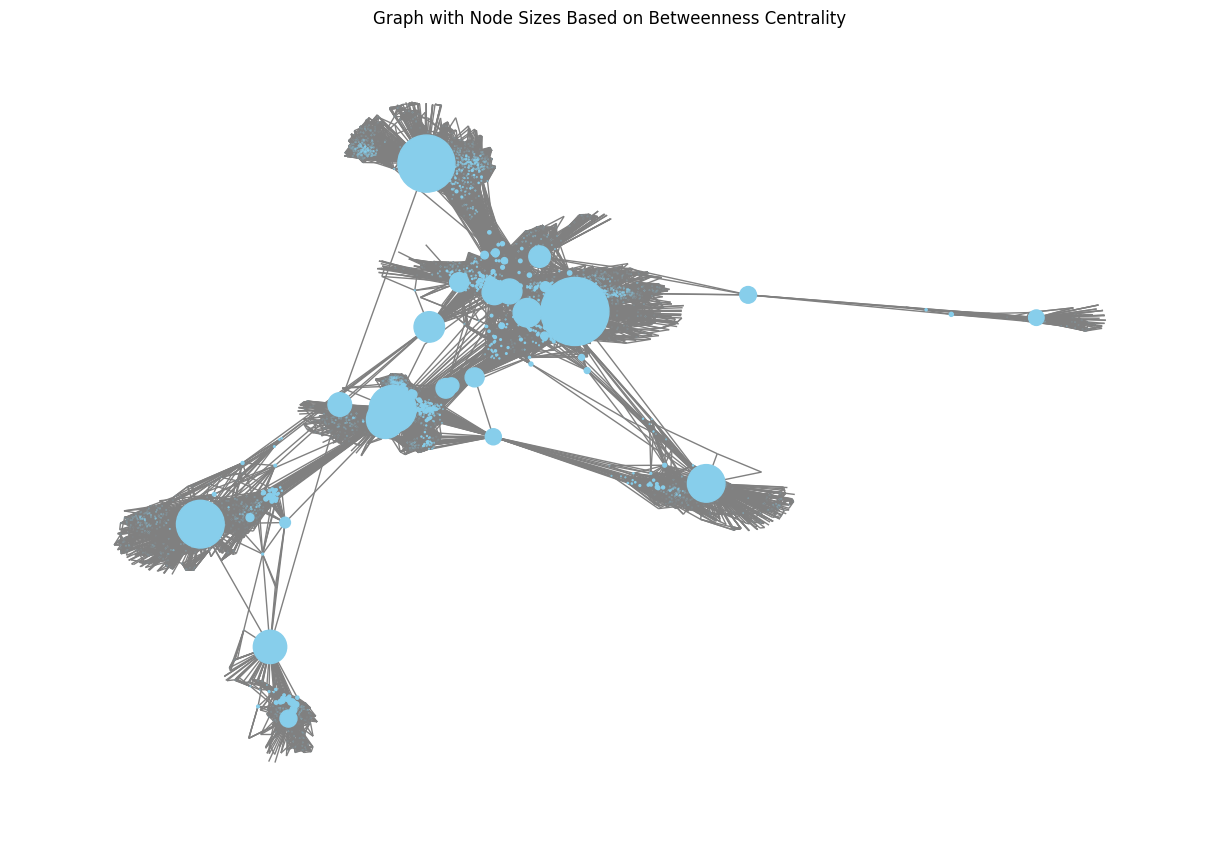

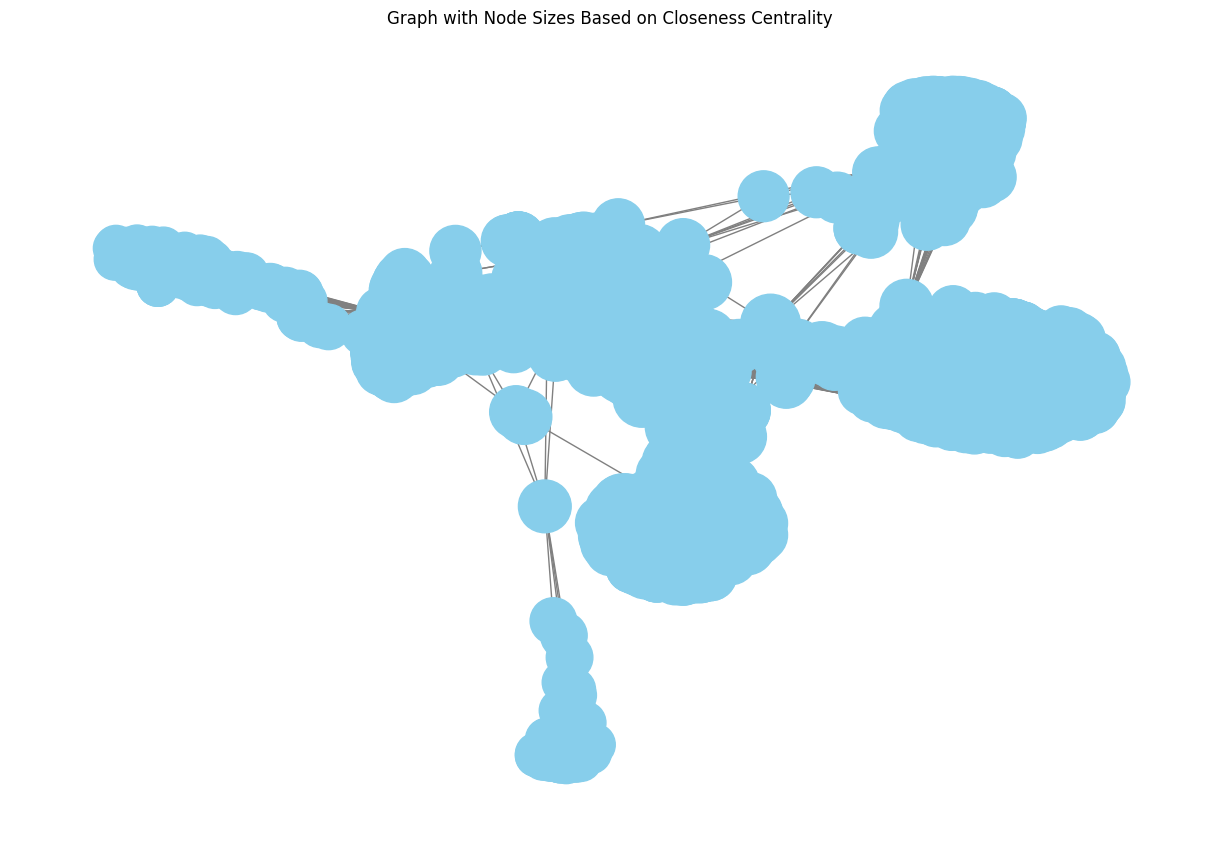

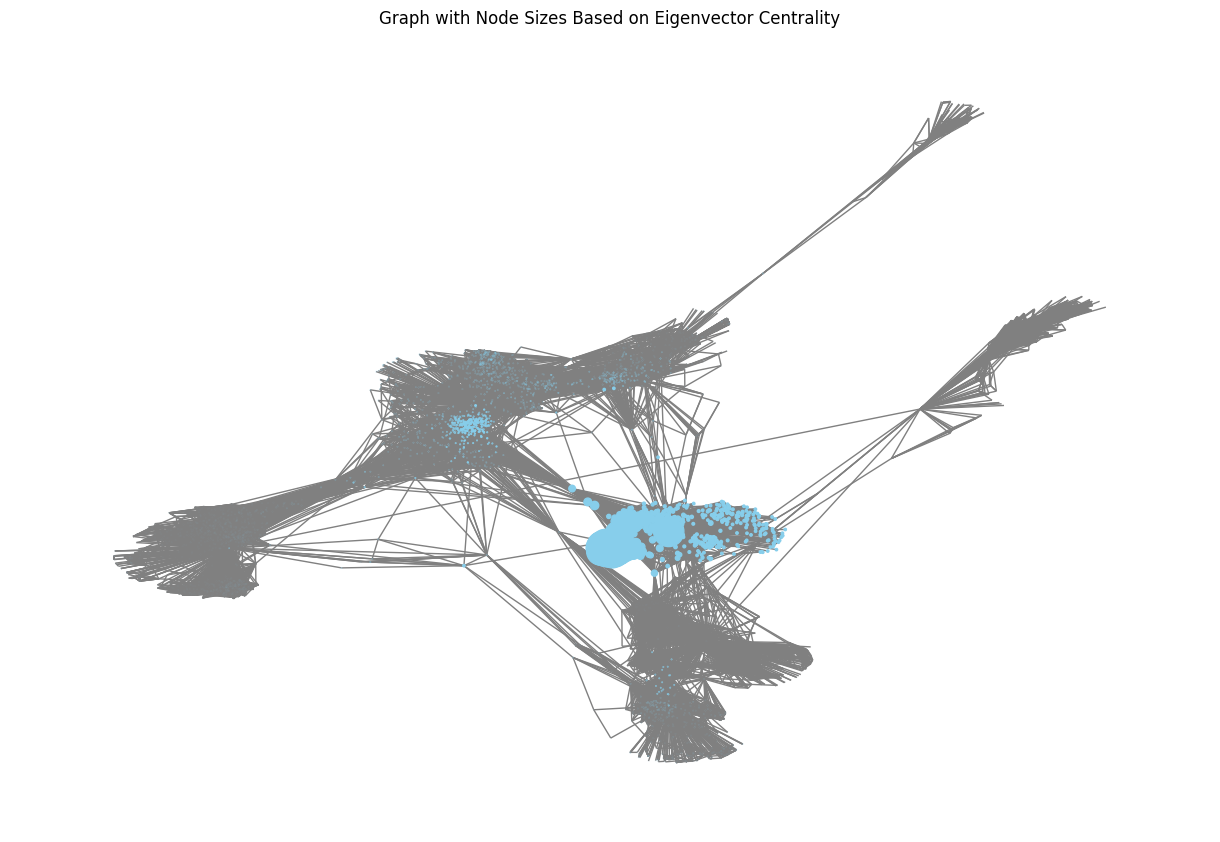

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load the Facebook Social Circles Dataset
def load_facebook_graph(file_path):
    """
    Loads the Facebook Social Circles dataset into a NetworkX graph.
    :param file_path: Path to the Facebook edge list file.
    :return: A NetworkX Graph object.
    """
    try:
        # Load the edge list into a graph
        G = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)
        print(f"Graph loaded with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
        return G
    except Exception as e:
        print(f"Error loading graph: {e}")
        return None

# Step 2: Analyze Network Centrality
def analyze_centrality(graph):
    """
    Calculate and print centrality measures for the graph.
    :param graph: The NetworkX graph object.
    :return: Dictionary of centrality measures.
    """
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    closeness_centrality = nx.closeness_centrality(graph)
    eigenvector_centrality = nx.eigenvector_centrality(graph)

    centralities = {
        "Degree Centrality": degree_centrality,
        "Betweenness Centrality": betweenness_centrality,
        "Closeness Centrality": closeness_centrality,
        "Eigenvector Centrality": eigenvector_centrality,
    }
    for name, centrality in centralities.items():
        print(f"{name}: Calculated for all nodes.")
    return centralities

# Step 3: Visualize the Graph
def visualize_graph(graph, centrality, title):
    """
    Visualize the graph with node sizes based on a centrality measure.
    :param graph: The NetworkX graph object.
    :param centrality: Centrality measure to scale node sizes.
    :param title: Title for the plot.
    """
    sizes = [5000 * centrality[node] for node in graph.nodes()]
    plt.figure(figsize=(12, 8))
    nx.draw(
        graph,
        with_labels=False,
        node_size=sizes,
        node_color="skyblue",
        edge_color="gray",
    )
    plt.title(title)
    plt.show()

# Step 4: Main Execution
if __name__ == "__main__":
    # Path to the Facebook edge list file
    file_path = "facebook_combined.txt"  # Ensure the file is in the same directory or provide the correct path.

    # Load the graph
    facebook_graph = load_facebook_graph(file_path)

    if facebook_graph:
        # Analyze centrality measures
        centrality_measures = analyze_centrality(facebook_graph)

        # Visualize the graph for each centrality measure
        for name, centrality in centrality_measures.items():
            visualize_graph(facebook_graph, centrality, f"Graph with Node Sizes Based on {name}")


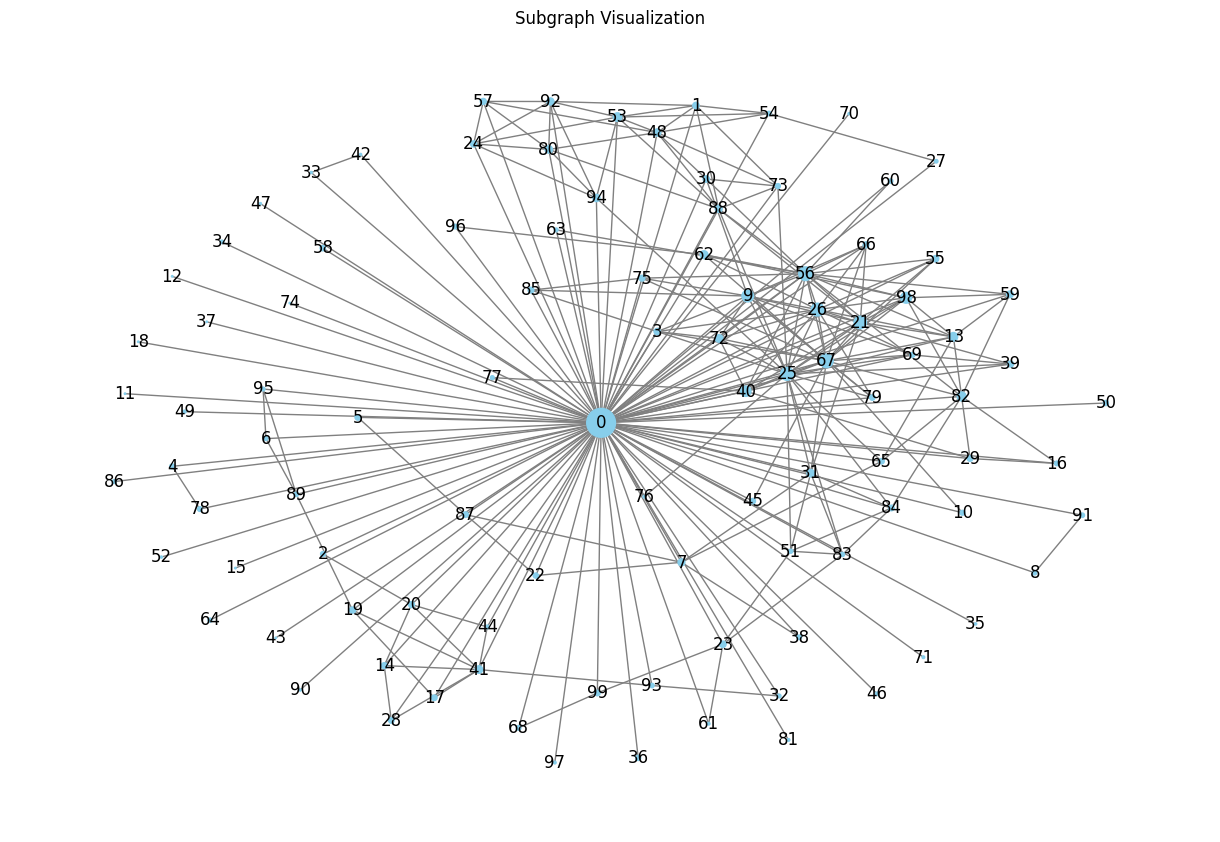

In [4]:
subgraph = facebook_graph.subgraph(list(facebook_graph.nodes())[:100])  # First 100 nodes
visualize_graph(subgraph, centrality_measures["Degree Centrality"], "Subgraph Visualization")